# Lab 8: Define and Solve an ML Problem of Your Choosing

In [3]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [4]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df_census = pd.read_csv(adultDataSet_filename)
df_airbnb = pd.read_csv(airbnbDataSet_filename)
df_whr = pd.read_csv(WHRDataSet_filename)
df_book_reviews = pd.read_csv(bookReviewDataSet_filename)

print("Census Data:")
print(df_census.head())
print("\nAirbnb Listings Data:")
print(df_airbnb.head())
print("\nWorld Happiness Report Data:")
print(df_whr.head())
print("\nBook Reviews Data:")
print(df_book_reviews.head())

Census Data:
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.0  United-States  

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I chose Census Data
2. Model will predict whether an individual's income is above or below $50K per year. The label is the income_binary column, which indicates whether the income is <=50K or >50K.
3. This is a supervised learning problem because we have labeled data with known outcomes that the model can learn from. This is a classification problem, specifically a binary classification problem, as there are two possible outcomes (<=50K or >50K).
4. The features include: age, workclass, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, native-country
5. Predicting income levels based on demographic and employment features is highly valuable for businesses and policymakers. By leveraging such a model, companies can effectively tailor their products and services to meet the needs of different income groups, optimize marketing strategies, and enhance customer targeting efforts. This not only improves business efficiency but also maximizes the impact of marketing campaigns. For financial institutions, this model serves as a tool to assess creditworthiness more accurately and design financial products that align with customers' income levels. Overall, this model aids in decision-making, enhances business operations, and contributes to addressing broader societal issues, providing significant value to both the private and public sectors.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

First few rows of the dataset:
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.

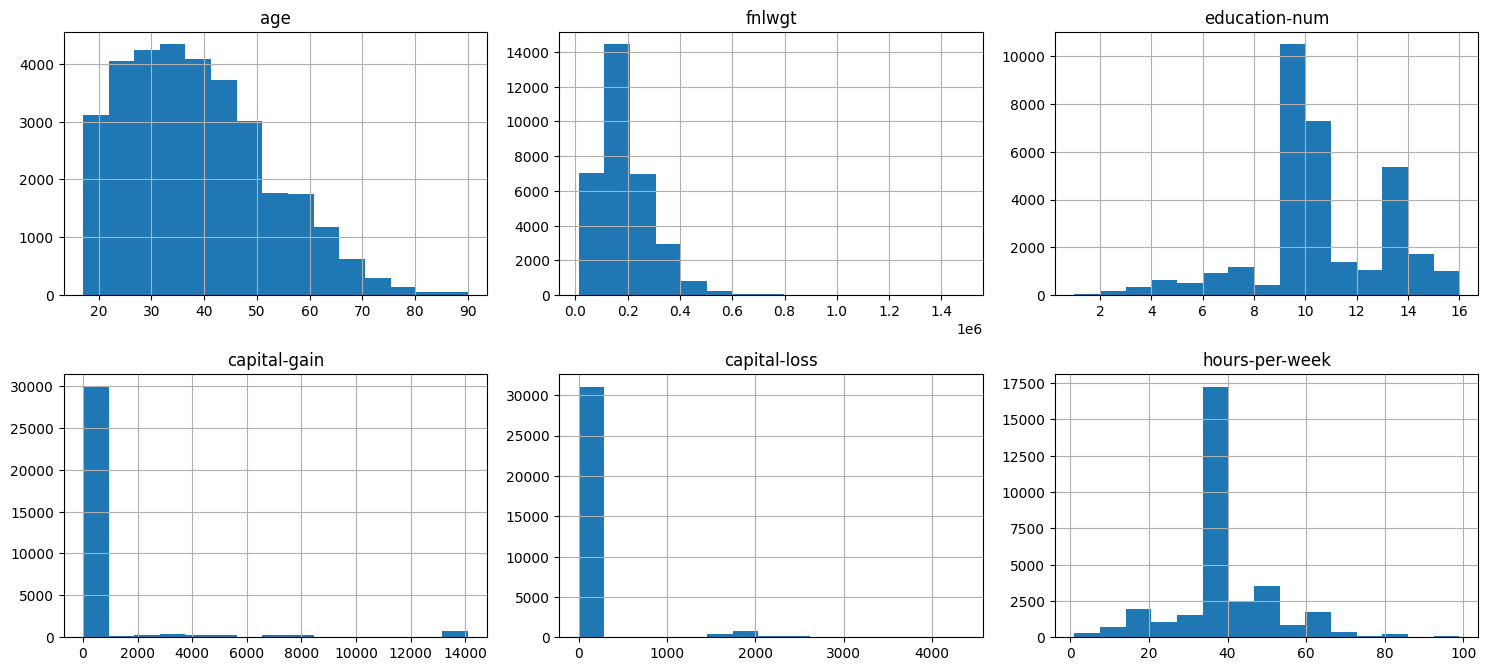

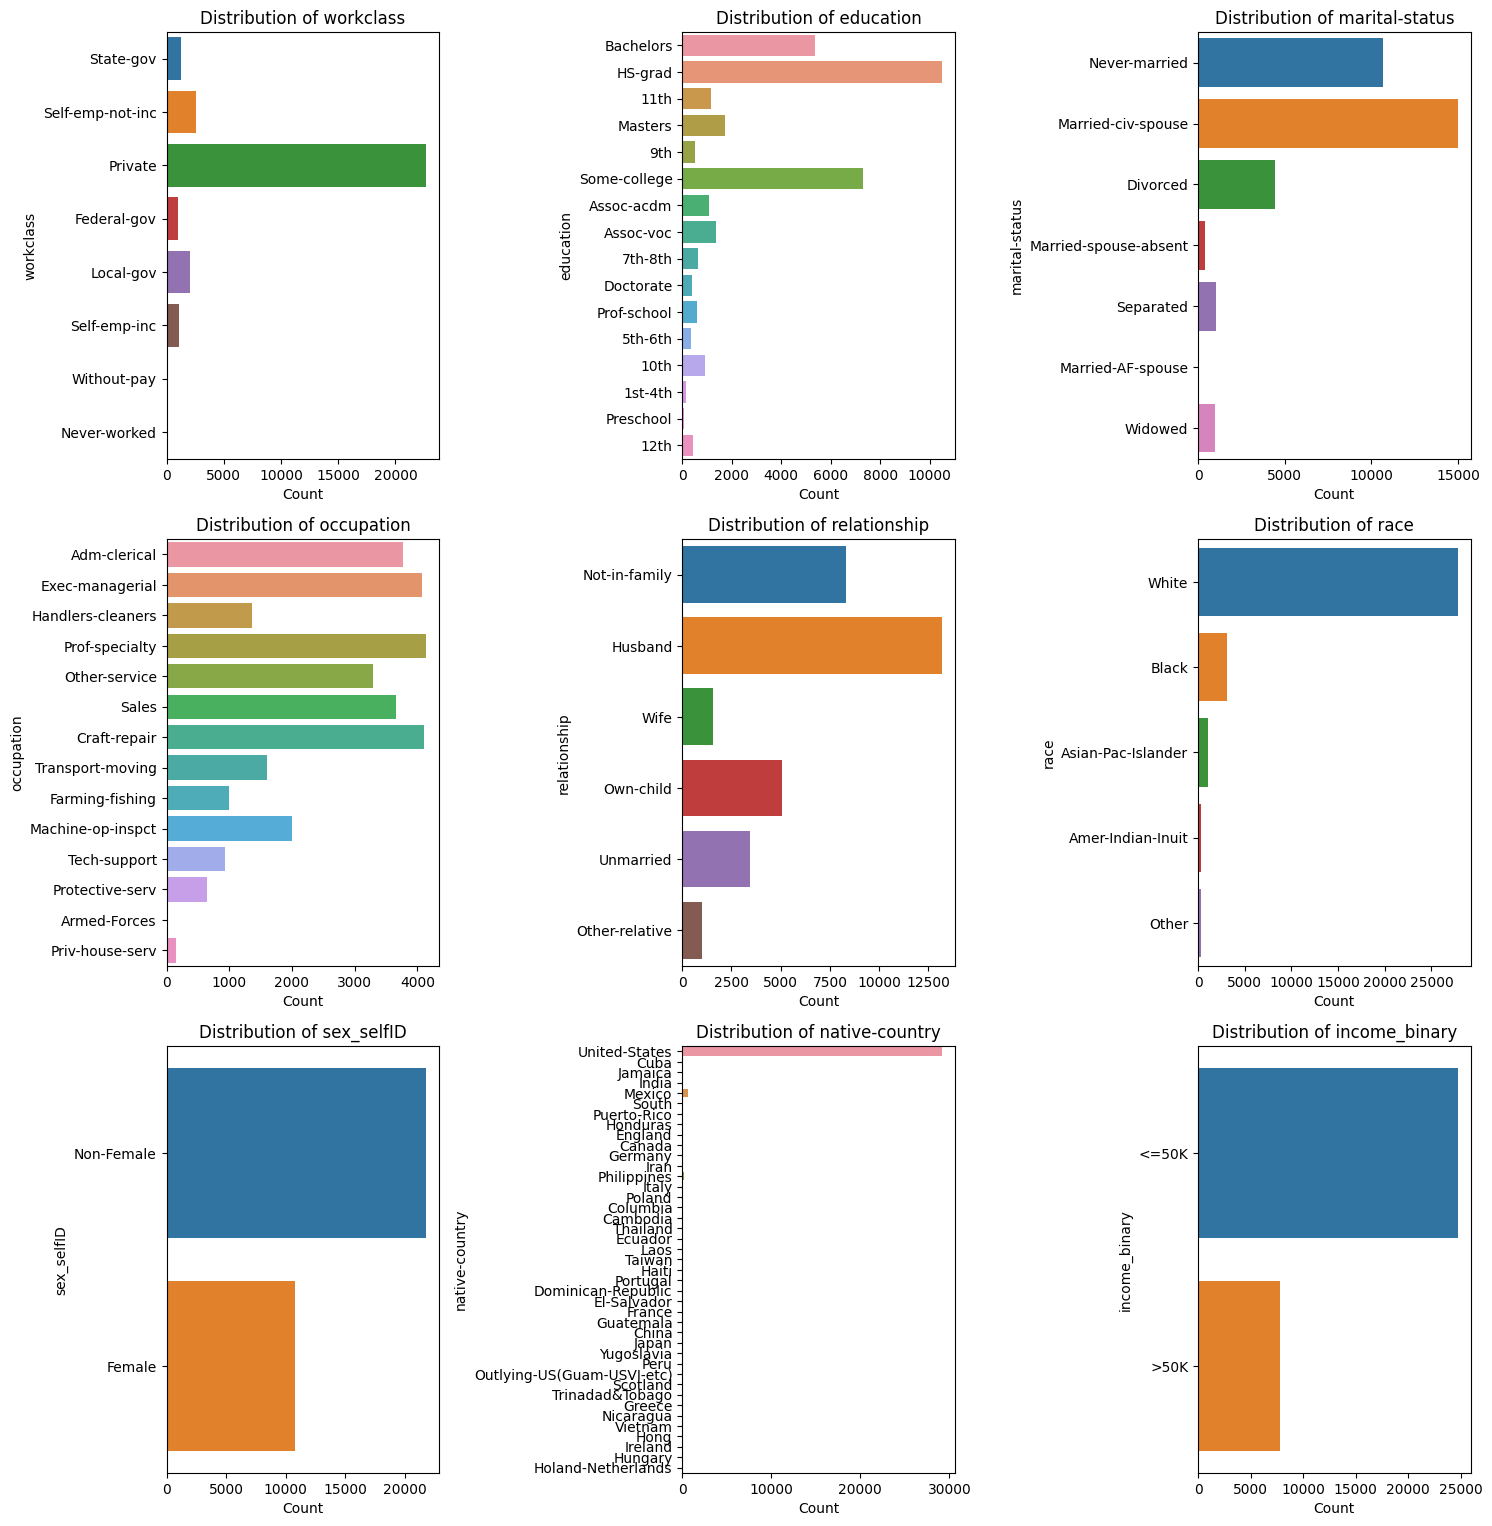


Class distribution of 'income_binary':
<=50K    0.75919
>50K     0.24081
Name: income_binary, dtype: float64


In [2]:
import pandas as pd
import numpy as np
import os

adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv") 
df_census = pd.read_csv(adultDataSet_filename)

print("First few rows of the dataset:")
print(df_census.head())

print("\nData types of each column:")
print(df_census.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df_census.isnull().sum())

print("\nDescriptive statistics for numerical columns:")
print(df_census.describe())

print("\nDescriptive statistics for categorical columns:")
print(df_census.describe(include=['object']))

import matplotlib.pyplot as plt

# Plot histograms 
df_census.hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

import seaborn as sns

# Plot bar charts for categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country', 'income_binary']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df_census, y=feature)
    plt.title(f"Distribution of {feature}")
    plt.xlabel('Count')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Check class distribution of the target variable
print("\nClass distribution of 'income_binary':")
print(df_census['income_binary'].value_counts(normalize=True))


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

After inspecting the census dataset, I have identified key features to retain and others to remove for efficient model building. The features I will keep include 'age', workclass, education-num, marital-status, occupation, relationship, race, sex_selfID, capital-gain, capital-loss, hours-per-week, and native-country. These features are crucial as they directly or indirectly influence income levels, providing demographic, socioeconomic, and employment-related insights. On the other hand, I have decided to remove fnlwgt, which is a weighting variable and not necessary for our predictive model, and education, which is categorical and redundant given that we have education-num as a numerical representation of education levels.

In preparing the data for modeling, I will address missing values by using the mean for numerical features like age and hours-per-week and the mode for categorical features like workclass, occupation, and native-country. Outliers in numerical data will be identified and potentially clipped or transformed to prevent skewing model results. Categorical variables will undergo one-hot encoding to convert them into a format suitable for machine learning algorithms. Additionally, I will ensure the dataset is balanced, particularly concerning the target variable income_binary, by considering techniques such as resampling if necessary.

For modeling, I plan to use a combination of decision trees and logistic regression, which are well-suited for classification problems with mixed data types. I will begin by splitting the dataset into training and test sets to ensure unbiased evaluation. The training process will involve tuning hyperparameters using cross-validation on a validation set to avoid overfitting. I will use metrics like accuracy, precision, recall, and F1-score to evaluate model performance. Throughout the process, I will iterate on the model by refining features and adjusting hyperparameters to improve generalization to unseen data. This comprehensive approach will help develop a robust model capable of effectively predicting income levels from the census data

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [3]:
# Load the dataset
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv") 
df_census = pd.read_csv(adultDataSet_filename)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df_census.head())

# Check data types and missing values
print("\nData types of each column:")
print(df_census.dtypes)
print("\nMissing values in each column:")
print(df_census.isnull().sum())

# Descriptive statistics
print("\nDescriptive statistics for numerical columns:")
print(df_census.describe(include=[np.number]))

print("\nDescriptive statistics for categorical columns:")
print(df_census.describe(include=[object]))


First few rows of the dataset:
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.

In [4]:
# Define feature columns and target
features = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 
    'sex_selfID', 'capital-gain', 'capital-loss', 'hours-per-week', 
    'native-country'
]
target = 'income_binary'

X = df_census[features]
y = df_census[target].apply(lambda x: 1 if x == '>50K' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Handling missing values and encoding categorical variables
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex_selfID', 'native-country']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [7]:
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', DecisionTreeClassifier(random_state=42))])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, max_iter=1000))])

# Train the Decision Tree model
dt_pipeline.fit(X_train, y_train)

# Train the Logistic Regression model
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex_selfID',
                                                   'native-country'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [8]:
y_pred_dt = dt_pipeline.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")

y_pred_lr = lr_pipeline.predict(X_test)
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4942
           1       0.63      0.64      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513

Accuracy: 0.822815906648242

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.61      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513

Accuracy: 0.8547520343927529


In [9]:
param_grid = {
    'classifier__max_depth': [5, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

best_dt_model = grid_search.best_estimator_
y_pred_optimized_dt = best_dt_model.predict(X_test)
print("\nOptimized Decision Tree Performance:")
print(classification_report(y_test, y_pred_optimized_dt))
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimized_dt)}")


Best parameters found:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5}
Best cross-validation accuracy: 0.85

Optimized Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4942
           1       0.76      0.60      0.67      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513

Accuracy: 0.8587440503608168


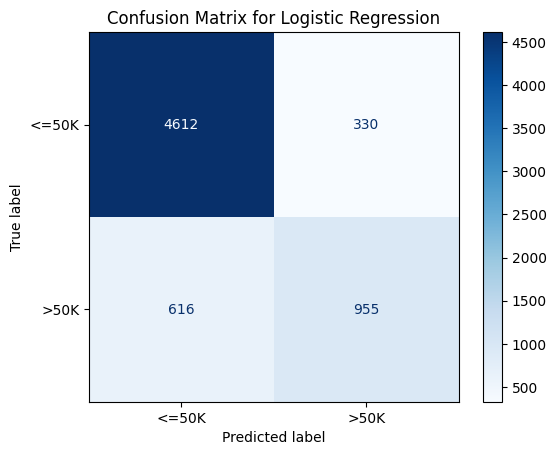

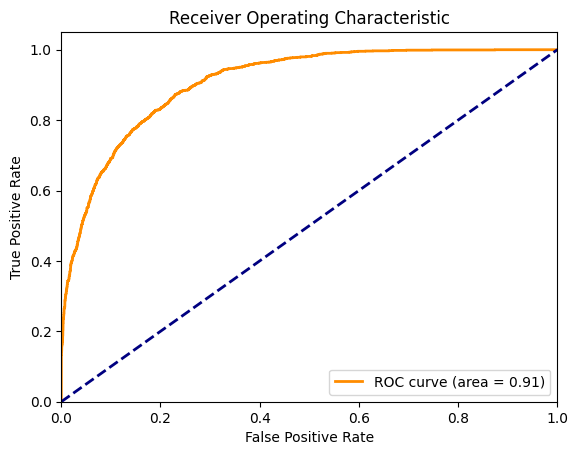

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix for Logistic Regression
y_pred_lr = lr_pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

# ROC Curve for Logistic Regression
y_pred_prob = lr_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#value of 0.91 is good enough